In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [4]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
encoder = LabelEncoder()

In [8]:
y_train= encoder.fit_transform(y_train)

y_test = encoder.transform(y_test)

In [9]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [10]:
X_train_tensor.shape

torch.Size([455, 30])

In [11]:
X_test_tensor.shape

torch.Size([114, 30])

In [12]:
y_train_tensor

tensor([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [13]:
y_test_tensor

tensor([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [17]:
class Model():

    def __init__(self,X):

        self.weights = torch.rand(X.shape[1],1,dtype=torch.float64,requires_grad=True)
        self.bias = torch.zeros(1,dtype=torch.float64,requires_grad=True)

    def forward(self,X):

        z = torch.matmul(X,self.weights) + self.bias
        y_pred = torch.sigmoid(z)

        return y_pred
    
    def loss_function(self,y_pred,y):

        epsilon= 1e-7
        y_pred = torch.clamp(y_pred,epsilon,1-epsilon)

        loss = -(y * torch.log(y_pred) + (1-y)*torch.log(1-y_pred)).mean()

        return loss

In [53]:
learning_rate = 0.25

epochs = 1000

In [54]:
model = Model(X_train_tensor)

In [55]:
x =[]
y =[]

for epoch in range(epochs):

    
    x.append(epoch)

    y_pred = model.forward(X_train_tensor)


    loss = model.loss_function(y_pred ,y_test_tensor)
    y.append(loss)

    print(f'Epoch:{epoch+1},Loss : {loss.item()}')

    loss.backward()

    with torch.no_grad():

        model.weights -= learning_rate * model.weights.grad

        model.bias -= learning_rate * model.bias.grad

    model.weights.grad.zero_()

    model.bias.grad.zero_()

Epoch:1,Loss : 3.718703023079527
Epoch:2,Loss : 3.422909204424197
Epoch:3,Loss : 3.1061040888668905
Epoch:4,Loss : 2.7587758566216865
Epoch:5,Loss : 2.3642921785548894
Epoch:6,Loss : 1.956753579956398
Epoch:7,Loss : 1.5876546204537392
Epoch:8,Loss : 1.297048312974071
Epoch:9,Loss : 1.0877738295178283
Epoch:10,Loss : 0.9628133788911177
Epoch:11,Loss : 0.8995563467435035
Epoch:12,Loss : 0.8637564842752475
Epoch:13,Loss : 0.8374267581148488
Epoch:14,Loss : 0.8153514282703195
Epoch:15,Loss : 0.7963020266242521
Epoch:16,Loss : 0.7798556569378108
Epoch:17,Loss : 0.7657239659509534
Epoch:18,Loss : 0.7536447191550107
Epoch:19,Loss : 0.7433699573278842
Epoch:20,Loss : 0.7346659149737657
Epoch:21,Loss : 0.7273129617499173
Epoch:22,Loss : 0.7211063622493197
Epoch:23,Loss : 0.7158590194333325
Epoch:24,Loss : 0.7114051208274336
Epoch:25,Loss : 0.7076025708017912
Epoch:26,Loss : 0.7043330691916092
Epoch:27,Loss : 0.7015001355824212
Epoch:28,Loss : 0.6990260343962805
Epoch:29,Loss : 0.696848460453348

In [56]:
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [57]:
y

[tensor(3.7187, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(3.4229, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(3.1061, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(2.7588, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(2.3643, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(1.9568, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(1.5877, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(1.2970, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(1.0878, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(0.9628, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(0.8996, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(0.8638, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(0.8374, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(0.8154, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(0.7963, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(0.7799, dtype=torch.float64, grad_fn=<NegBackward0>),
 tensor(

In [58]:
values = [t.item() for t in y]

In [59]:
values

[3.718703023079527,
 3.422909204424197,
 3.1061040888668905,
 2.7587758566216865,
 2.3642921785548894,
 1.956753579956398,
 1.5876546204537392,
 1.297048312974071,
 1.0877738295178283,
 0.9628133788911177,
 0.8995563467435035,
 0.8637564842752475,
 0.8374267581148488,
 0.8153514282703195,
 0.7963020266242521,
 0.7798556569378108,
 0.7657239659509534,
 0.7536447191550107,
 0.7433699573278842,
 0.7346659149737657,
 0.7273129617499173,
 0.7211063622493197,
 0.7158590194333325,
 0.7114051208274336,
 0.7076025708017912,
 0.7043330691916092,
 0.7015001355824212,
 0.6990260343962805,
 0.6968484604533487,
 0.6949174915644611,
 0.6931930119718234,
 0.6916426323170531,
 0.6902400515690648,
 0.6889637821533219,
 0.6877961614828575,
 0.6867225846289473,
 0.6857309061683304,
 0.6848109711902378,
 0.6839542451508901,
 0.6831535197643059,
 0.6824026777694933,
 0.6816965036193869,
 0.6810305302532359,
 0.680400914425955,
 0.6798043347907067,
 0.6792379082232873,
 0.6786991208540146,
 0.678185771017910

In [60]:
!pip install matplotlib

In [61]:
import matplotlib.pyplot as plt

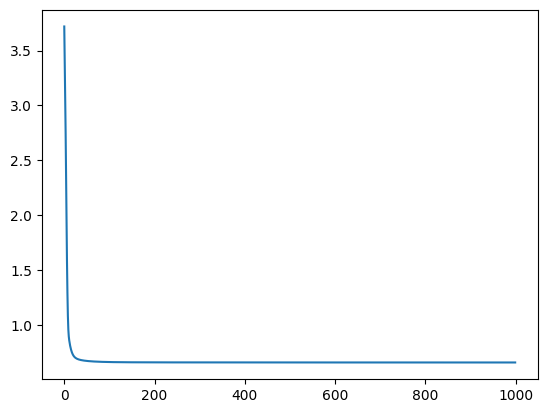

In [62]:
plt.plot(x, values, label="y vs x")